In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [87]:
#import the nedded library
from sklearn import datasets#for creating the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import jaccard_score
from sklearn.metrics.cluster import rand_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [88]:
n_samples = 300
random_state=97  
X,y = datasets.make_blobs(n_samples=n_samples,random_state=random_state) #define X y

dtatset1


# **Kmean Algorithem**

In [89]:
#this function crete the initial_centroids
#X is a numpy array representing the dataset
#K is an integer representing the number of clusters we want to create.
def initial_centroids(X,K):

        #np.random.seed(69)

        centroids = np.zeros((K,  X.shape[1]))

        for k in range(K):

            centroid = X[np.random.choice(range(X.shape[0]))]

            centroids[k] = centroid

        return centroids

In [90]:
call_one=initial_centroids(X,3)
#we call the function we created and choose the value of k randomly

In [91]:
#we will create a function that calculte the euclidean_distance
def euclidean_distance(point, centroid):

    return np.argmin(np.sqrt(np.sum((point - centroid)**2, axis=1)))

In [92]:
def create_clusters(X, K ,centroids):#this function create a new cluster based on the number of k

        clusters = [  [] for i in range(K)   ]#create number of cluster based on centriod


        for point_index,point in enumerate(X):

            Nearest_centroid = euclidean_distance(point,centroids)#check each point with all centriod

            clusters[Nearest_centroid].append(point_index)#append each point to  the nearest point


        return clusters

In [93]:
call_two=create_clusters(X, 3 ,call_one)
#we call the function create cluster and send 3 values

In [94]:
#caluclate the mean of each centriod
def means(X,cluster_Points):
    return np.mean(X[cluster_Points],axis=0)

In [95]:
call_three=means(X,call_two[0])
# m

In [96]:
def update_centroids(clusters,K,X):

        centroids = np.zeros((K, X.shape[1]))


        for cluster_index, cluster_Points in enumerate(clusters):


            update_centroid = means(X,cluster_Points)

            centroids[cluster_index] = update_centroid


        return centroids

In [97]:
update=update_centroids(call_two,3,X)

In [98]:
def predict_cluster(clusters, X):

        cluster_pred = np.zeros(X.shape[0])

        for cluster_index, cluster_Points in enumerate(clusters):
            for i in cluster_Points:
                cluster_pred[i] = cluster_index


        return cluster_pred

In [99]:
l_pred=predict_cluster(call_two, X)

In [100]:
def K_MeansClustering(X , K ,Maximum_iteration):
    

        centroids = initial_centroids(X,K)

        for i in range(Maximum_iteration):

            clusters = create_clusters(X,K ,centroids)

            previous_centroids = centroids
            centroids = update_centroids(clusters, K ,X)

            different = centroids - previous_centroids

            if not different.any():
                break


        y_pred = predict_cluster(clusters, X)
        plt.scatter(X[:,0],X[:,1],c=y_pred,s=15)


        return y_pred

#*dataset1**

In [101]:
X,y = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
pd.Series(y).unique()

array([2, 1, 0])

array([2., 1., 0.])

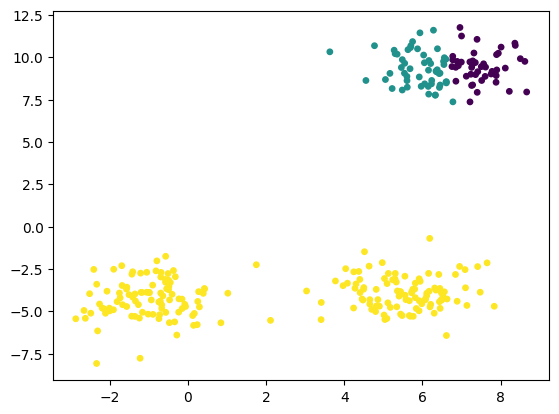

In [19]:
K_d1=K_MeansClustering(X,3,150)
pd.Series(K_d1).unique()

In [20]:

from_1_to_2=(K_d1==1)
from_0_to_1=(K_d1==0)
from_2_to_0=(K_d1==2)


K_d1[from_1_to_2]=2
K_d1[from_0_to_1]=1
K_d1[from_2_to_0]=0

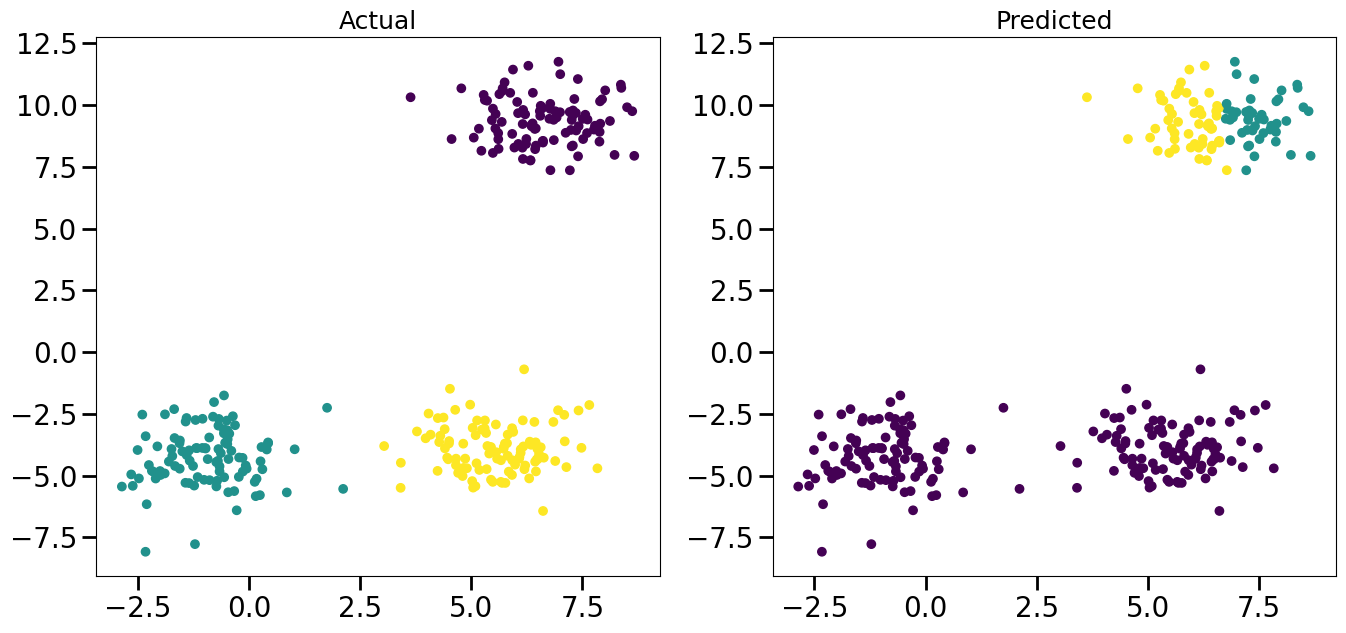

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].scatter(X[:,0],X[:,1], c=y)
axes[1].scatter(X[:,0],X[:,1], c=K_d1)

axes[0].tick_params(length=10, width=2, labelsize=20)
axes[1].tick_params(length=10, width=2, labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)
plt.show()

In [22]:
#F-measure:
F_K1=f1_score(y, K_d1, average='macro')
F_K1

0.0

In [23]:
#Normalized mutual information:
NMI_K1=normalized_mutual_info_score(y,K_d1)
NMI_K1

0.6480144609966213

In [24]:
#Rand Statistic
R_K1=rand_score(y,K_d1)
R_K1

0.721850613154961

# Dataset-2


In [25]:
X, y= datasets.make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)
pd.Series(y).unique()

array([2, 1, 0])

array([1., 0., 2.])

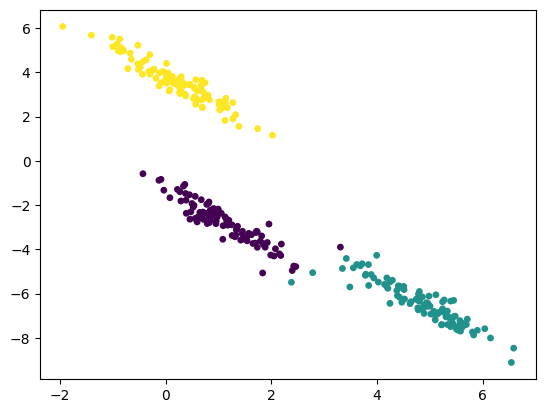

In [26]:
K_d2= K_MeansClustering(X,3,150)
pd.Series(K_d2).unique()

In [27]:
from_1_to_2=(K_d2==1)
from_0_to_1=(K_d2==0)
from_2_to_0=(K_d2==2)


K_d2[from_1_to_2]=2
K_d2[from_0_to_1]=1
K_d2[from_2_to_0]=0

Text(0.5, 1.0, 'Predicted')

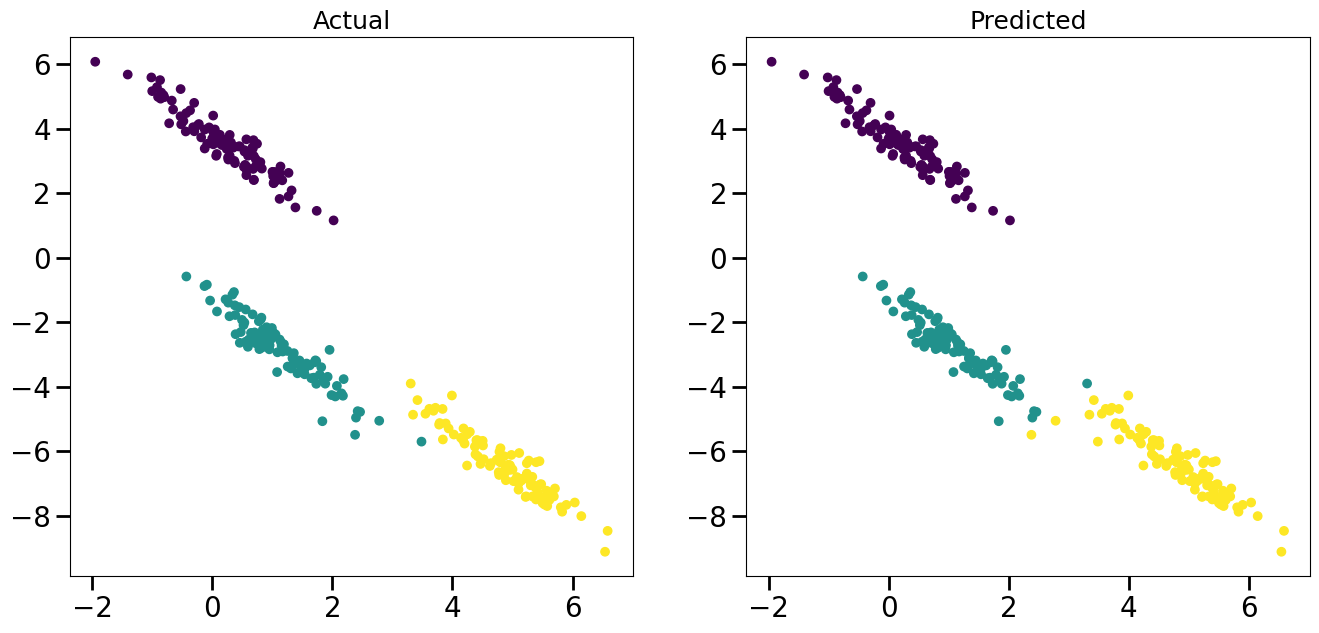

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].scatter(X[:,0],X[:,1], c=y)
axes[1].scatter(X[:,0],X[:,1], c=K_d2)

axes[0].tick_params(length=10, width=2, labelsize=20)
axes[1].tick_params(length=10, width=2, labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [29]:
#F-measure:
F_K2=f1_score(y, K_d2, average='macro')
F_K2

0.9866653331999866

In [30]:
#Normalized mutual information:
NMI_K2=normalized_mutual_info_score(y,K_d2)
NMI_K2

0.9420616638282064

In [31]:
#Rand Statistic
R_K2=rand_score(y,K_d2)
R_K2

0.9825195094760312

dataset3


In [32]:
X,y = datasets.make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)
pd.Series(y).unique()

array([1, 0])

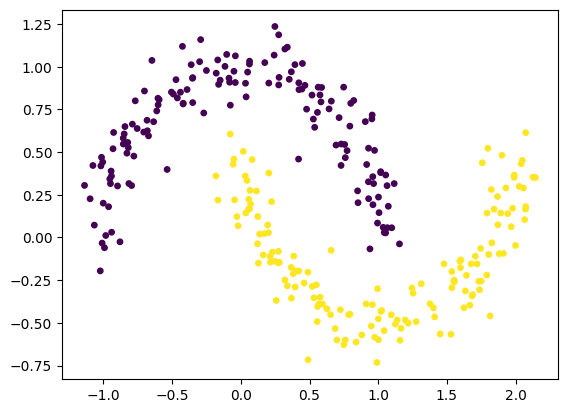

In [33]:
plt.scatter(X[:,0],X[:,1],c=y,s=15)

array([1., 0.])

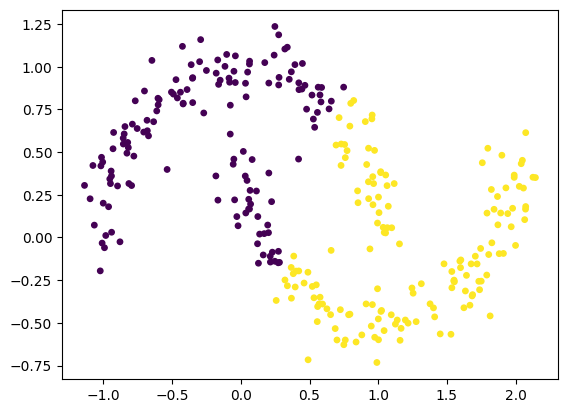

In [34]:
K_d3= K_MeansClustering(X, 2,150)
pd.Series(K_d3).unique() #no need for correction

Text(0.5, 1.0, 'Predicted')

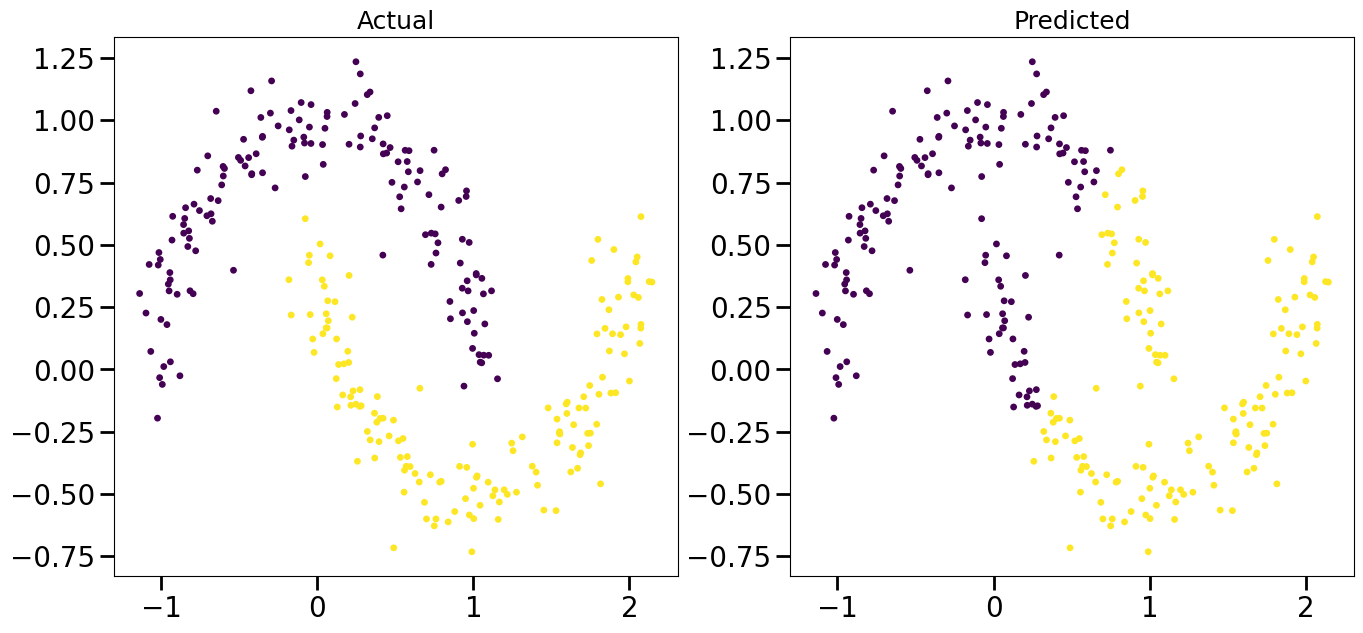

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].scatter(X[:,0],X[:,1], c=y,s=15)
axes[1].scatter(X[:,0],X[:,1], c=K_d3, s=15)

axes[0].tick_params(length=10, width=2, labelsize=20)
axes[1].tick_params(length=10, width=2,labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [36]:
#F-measure:
F_K3=f1_score(y, K_d3, average='macro')
F_K3

0.7499749974997499

In [37]:
#Normalized mutual information:
NMI_K3=normalized_mutual_info_score(y,K_d3)
NMI_K3

0.18884536225760176

In [38]:
#Rand Statistic
R_K3=rand_score(y,K_d3)
R_K3

0.6237458193979933

dataset4

In [39]:
X,y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05,random_state=random_state)
pd.Series(y).unique()

array([1, 0])

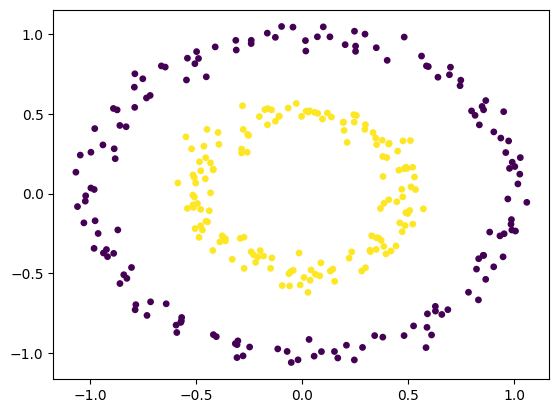

In [40]:
plt.scatter(X[:,0],X[:,1],c=y,s=15)

array([1., 0.])

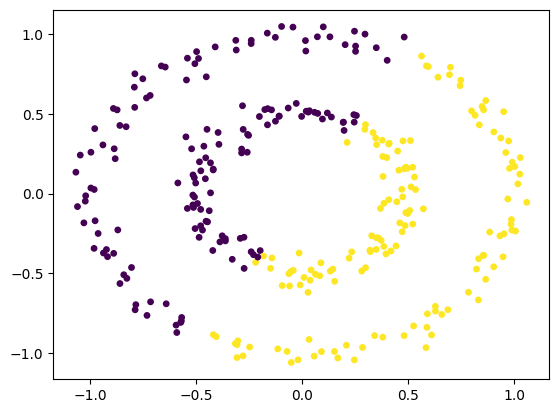

In [41]:
K_d4 =K_MeansClustering(X, 2,150)
pd.Series(K_d4).unique()

Text(0.5, 1.0, 'Predicted')

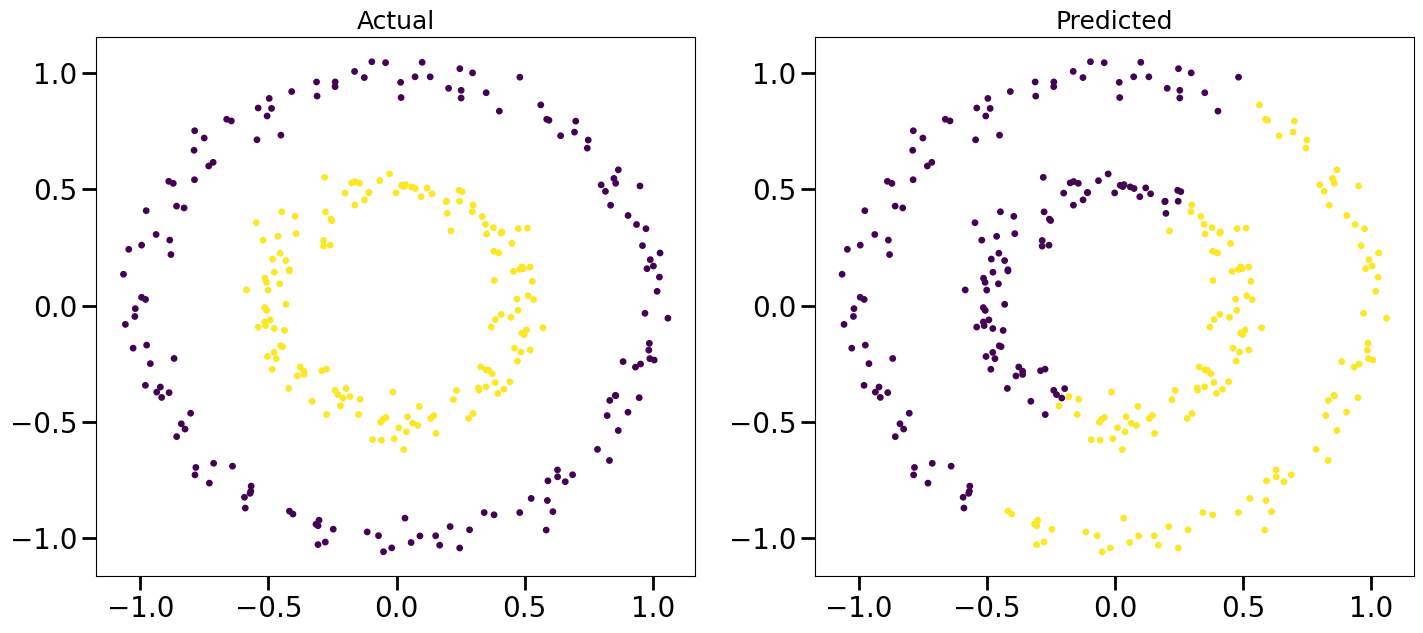

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(17,7))

axes[0].scatter(X[:,0],X[:,1], c=y,s=15)
axes[1].scatter(X[:,0],X[:,1], c=K_d4, s=15)

axes[0].tick_params(length=10, width=2,labelsize=20)
axes[1].tick_params(length=10, width=2,labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [43]:
#F-measure:
F_K4=f1_score(y, K_d4, average='macro')
F_K4

0.49331081381394726

In [44]:
#Normalized mutual information:
NMI_K4=normalized_mutual_info_score(y,K_d4)
NMI_K4

0.00012827439057357289

In [45]:
#Rand Statistic
R_K4=rand_score(y,K_d4)
R_K4

0.4984169453734671

**DBSCAN**

In [46]:
def DensityRegion(Data, Index_P, eps):

        neighbors = []
        Data_len=len(Data)
        #from 0 into the all length of the data.
        for Point in range(0, Data_len):
        #this line calc the ECU for each index from p and compere if it less than the eps.
            if np.linalg.norm(Data[Index_P] - Data[Point]) < eps:
                neighbors.append(Point)#hold the point from neigh


        return neighbors

In [47]:
def DensityConnected(Data, y_pred, Index_P, Neighbors_P, ID, eps, MinPts):
        #our point e stop on it
            y_pred[Index_P] = ID

            i = 0
            while i < len(Neighbors_P):

                Point = Neighbors_P[i]
                #not include to any cluster
                if y_pred[Point] == -1:
                    y_pred[Point] = ID
                 # point not visit
                elif y_pred[Point] == 0:
                    y_pred[Point] = ID
                   #applay the method
                    Neighbors_Point = DensityRegion(Data, Point, eps)


                    if len(Neighbors_Point) >= MinPts:
                       Neighbors_P = Neighbors_P + Neighbors_Point
                #increment the point
                i += 1

In [48]:
def dbscanAlgo(Data, eps, MinPts):

    Data_len=len(Data)
    # make all element zero
    y_pred = np.zeros(Data_len)

    ID= 0
    for Point in range(0, Data_len):

        if (y_pred[Point] == 0):
            Neighbors_P = DensityRegion(Data, Point, eps)

            if len(Neighbors_P) >= MinPts:
                ID += 1
                #decide each point if it (core,border)
                DensityConnected(Data, y_pred, Point, Neighbors_P, ID, eps, MinPts)

            else: #noise point
                y_pred[Point] = -1

        else:
            continue


    return y_pred

dataset1

In [49]:
X,y = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
pd.Series(y).unique()

array([2, 1, 0])

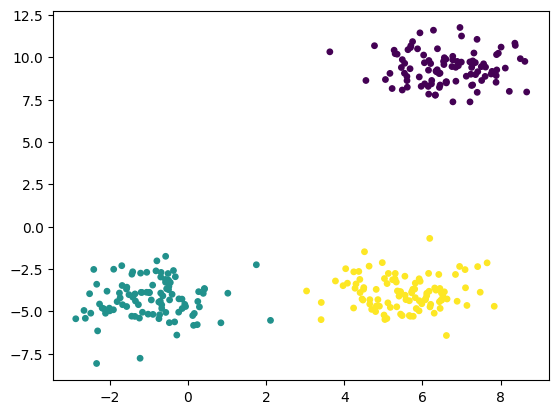

In [50]:
plt.scatter(X[:,0],X[:,1],c=y,s=15)

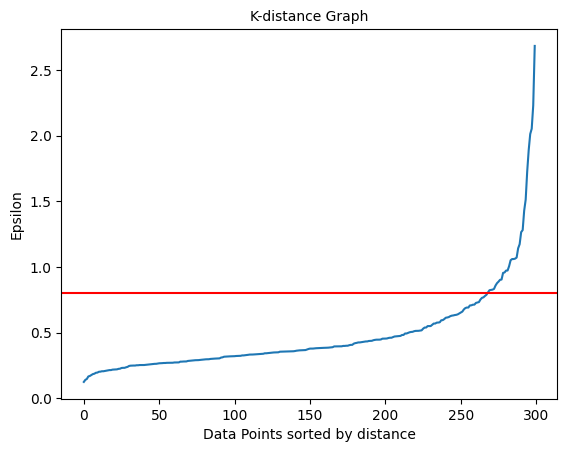

In [51]:
minPt=4

n=NearestNeighbors(n_neighbors=(minPt+1))
nb=n.fit(X)

distence,indeces=nb.kneighbors(X)
distence=np.sort(distence,axis=0)
distence=distence[:,4]

plt.plot(distence)
plt.axhline(y=0.8, c='red')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

array([ 1.,  2.,  3., -1.])

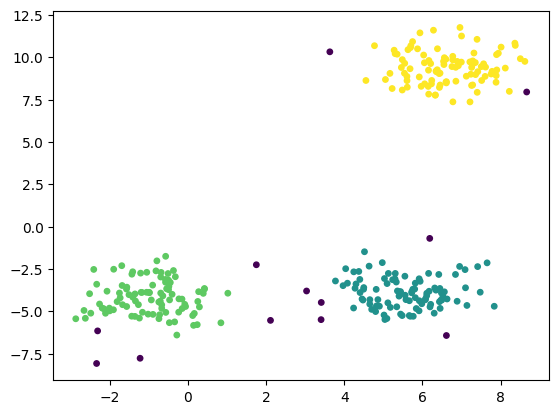

In [52]:
D_d1=dbscanAlgo(X,0.8,4)
plt.scatter(X[:,0],X[:,1],c=D_d1,s=15)
pd.Series(D_d1).unique()

In [53]:
from_1_to_2=(D_d1==1)
from_2_to_1=(D_d1==2)
from_3_to_0=(D_d1==3)


D_d1[from_1_to_2]=2
D_d1[from_2_to_1]=1
D_d1[from_3_to_0]=0

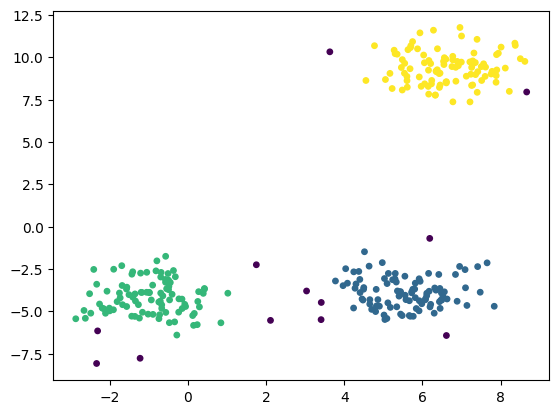

In [54]:
dbscan=DBSCAN(0.8,min_samples=4)
dbscan.fit(X)
y_pred=dbscan.labels_

plt.scatter(X[:,0],X[:,1],c=y_pred,s=15)

Text(0.5, 1.0, 'Predicted')

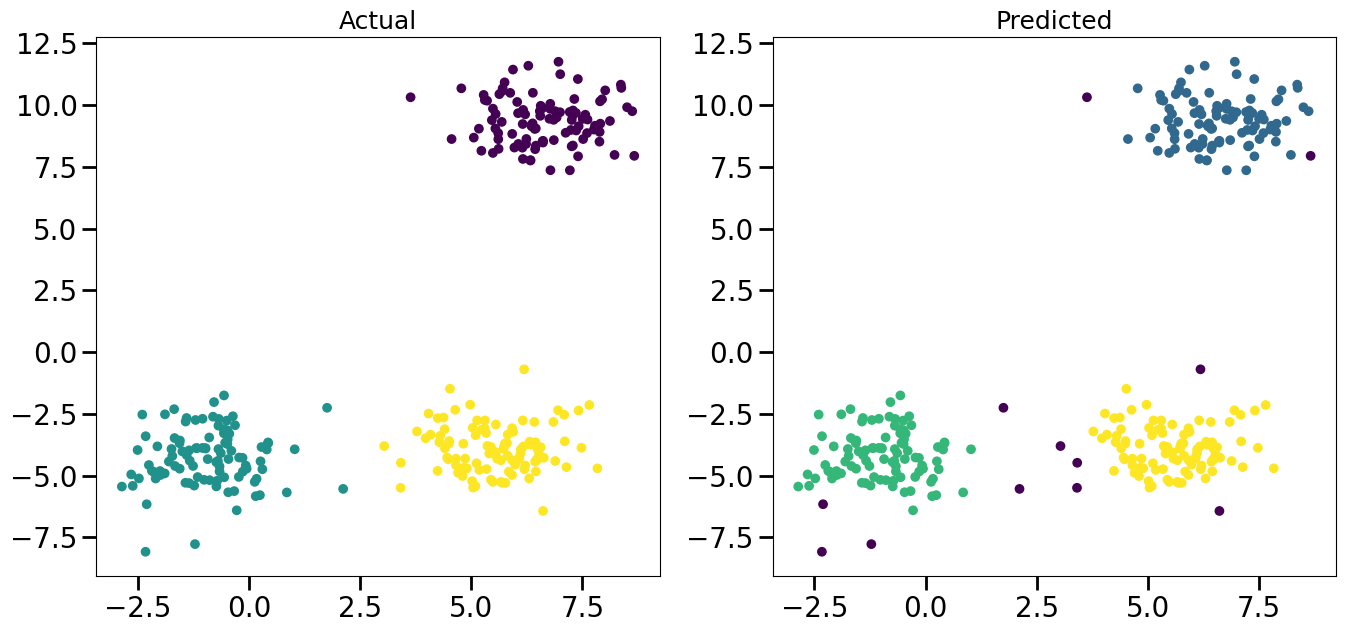

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].scatter(X[:,0],X[:,1], c=y)
axes[1].scatter(X[:,0],X[:,1], c=D_d1)

axes[0].tick_params(length=10, width=2,  labelsize=20)
axes[1].tick_params(length=10, width=2, labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

validation

In [56]:
#F-measure:
F_D1=f1_score(y, D_d1, average='macro')
F_D1

0.7346542346542346

In [57]:
#Normalized mutual information:
NMI_D1=normalized_mutual_info_score(y,D_d1)
NMI_D1

0.9111848948786972

In [58]:
#Rand Statistic
R_D1=rand_score(y,D_d1)
R_D1

0.9734448160535117

dataset2

In [59]:
X, y = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)
pd.Series(y).unique()

array([2, 1, 0])

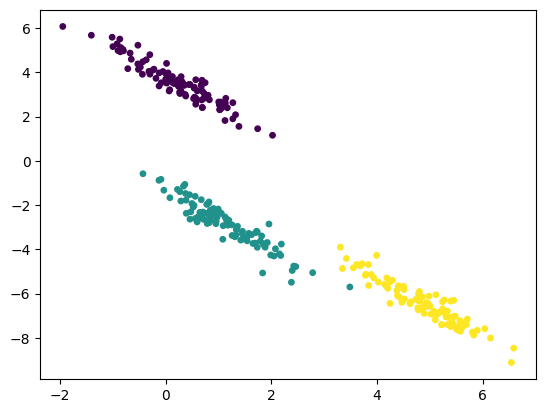

In [60]:
plt.scatter(X[:,0],X[:,1],c=y,s=15)

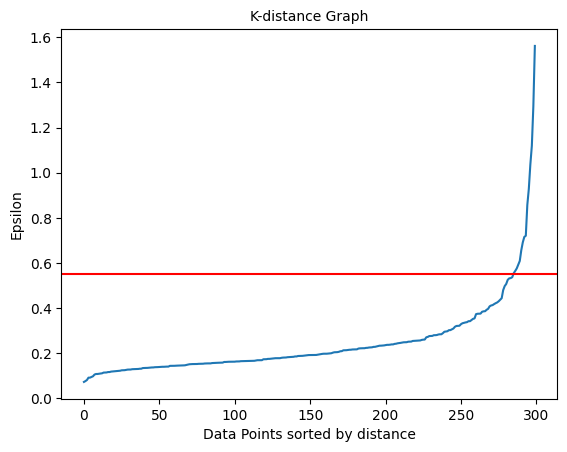

In [61]:
minPt=4

n=NearestNeighbors(n_neighbors=(minPt+1))
nb=n.fit(X)

distence,indeces=nb.kneighbors(X)
distence=np.sort(distence,axis=0)
distence=distence[:,4]

plt.plot(distence)
plt.axhline(y=0.55, c='red')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

array([ 1.,  2.,  3., -1.])

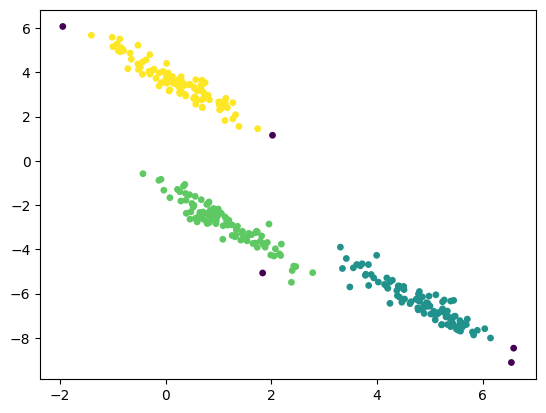

In [62]:
D_d2=dbscanAlgo(X,0.55,4)
plt.scatter(X[:,0],X[:,1],c=D_d2,s=15)
pd.Series(D_d2).unique()

In [63]:
#correct labels (to not result zero in f-measure)
from_1_to_2=(D_d2==1)
from_2_to_1=(D_d2==2)
from_3_to_0=(D_d2==3)


D_d2[from_1_to_2]=2
D_d2[from_2_to_1]=1
D_d2[from_3_to_0]=0

Text(0.5, 1.0, 'Predicted')

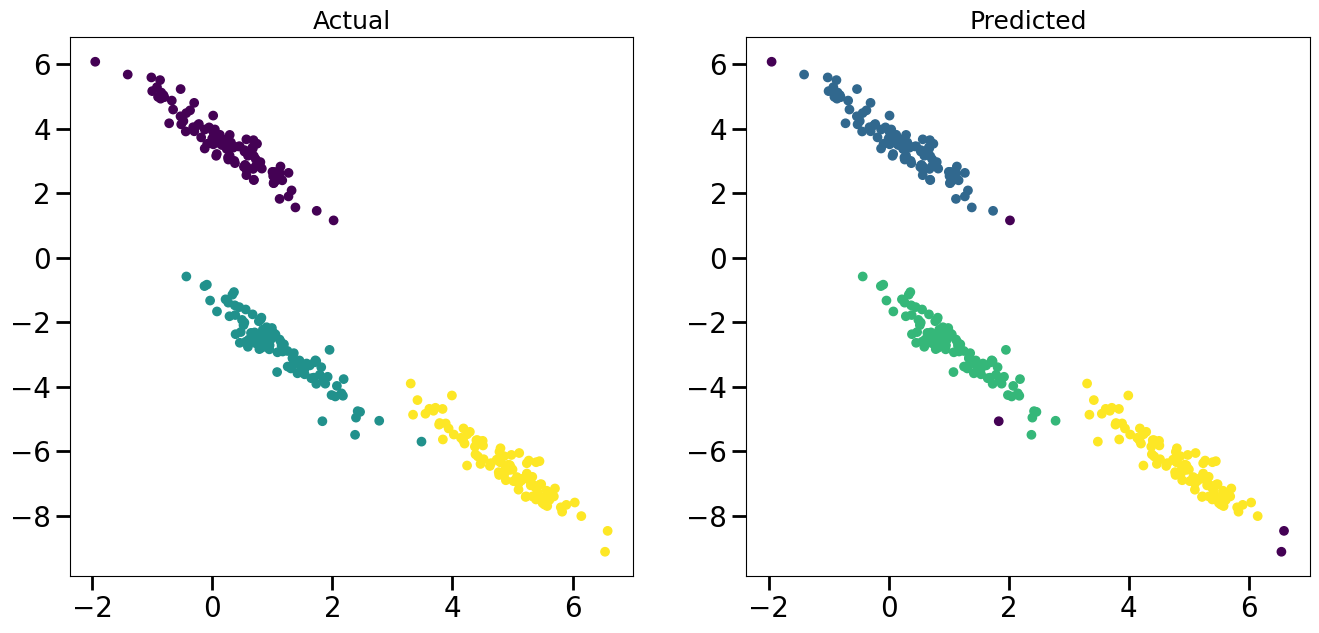

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].scatter(X[:,0],X[:,1], c=y)
axes[1].scatter(X[:,0],X[:,1], c=D_d2)

axes[0].tick_params(length=10, width=2, labelsize=20)
axes[1].tick_params(length=10, width=2, labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

validation

In [65]:
#F-measure:
F_K2=f1_score(y, D_d2, average='macro')
F_K2

0.7411806507283895

In [66]:
#Normalized mutual information:
NMI_D2=normalized_mutual_info_score(y,D_d2)
NMI_D2

0.938650220113105

In [67]:
#Rand Statistic
R_D2=rand_score(y,D_d2)
R_D2

0.9845039018952062

dataset3

In [68]:
X,y = datasets.make_moons(n_samples=n_samples, noise=0.1,random_state=random_state)
pd.Series(y).unique()

array([1, 0])

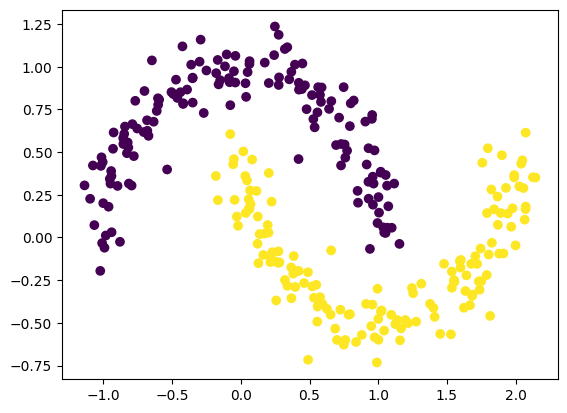

In [69]:
plt.scatter(X[:,0],X[:,1],c=y)

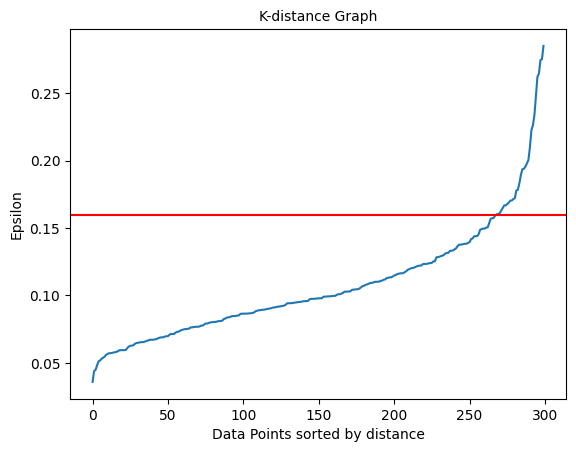

In [70]:
minPt=4
n=NearestNeighbors(n_neighbors=(minPt+1))
nb=n.fit(X)

distence,indeces=nb.kneighbors(X)
distence=np.sort(distence,axis=0)
distence=distence[:,4]

plt.plot(distence)
plt.axhline(y=0.16, c='red')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

array([ 2.,  1., -1.])

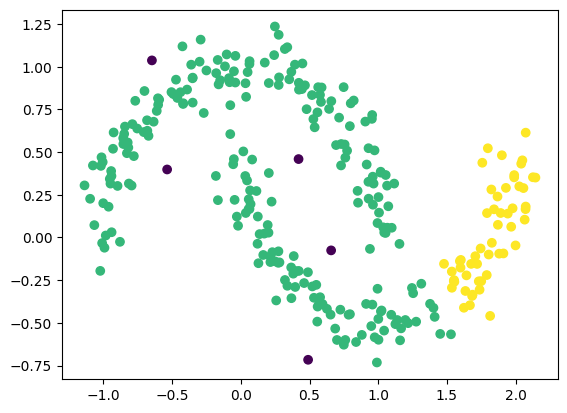

In [71]:
D_d3=dbscanAlgo(X,0.17,4)
plt.scatter(X[:,0],X[:,1],c=D_d3)
pd.Series(D_d3).unique()

In [72]:
#correct labels (to not result zero in f-measure)
from_2_to_1=(D_d3==2)
from_1_to_0=(D_d3==1)


D_d3[from_2_to_1]=1
D_d3[from_1_to_0]=0

Text(0.5, 1.0, 'Predicted')

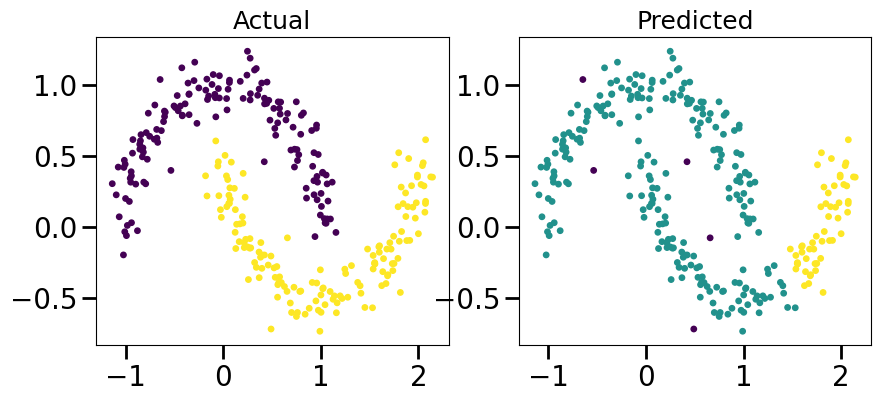

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].scatter(X[:,0],X[:,1], c=y,s=15)
axes[1].scatter(X[:,0],X[:,1], c=D_d3, s=15)

axes[0].tick_params(length=10, width=2, labelsize=20)
axes[1].tick_params(length=10, width=2, labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

validation

In [74]:
F_D3=f1_score(y, D_d3, average='macro')
F_D3

0.4271099744245525

In [75]:
NMI_D3=normalized_mutual_info_score(y,D_d3)
NMI_D3

0.23224952896683834

In [76]:
R_D3=rand_score(y,D_d3)
R_D3

0.5621627647714604

dataset4

In [77]:
X,y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05,random_state=random_state)
pd.Series(y).unique()

array([1, 0])

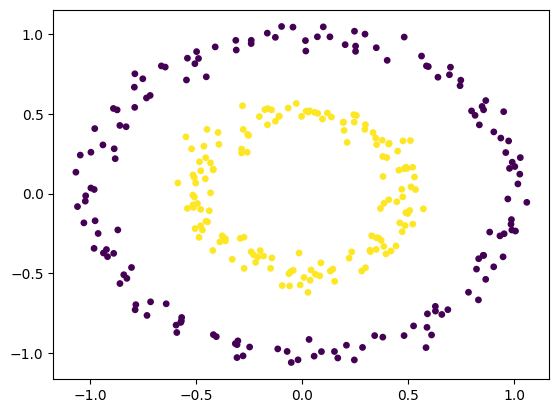

In [78]:
plt.scatter(X[:,0],X[:,1],c=y,s=15)

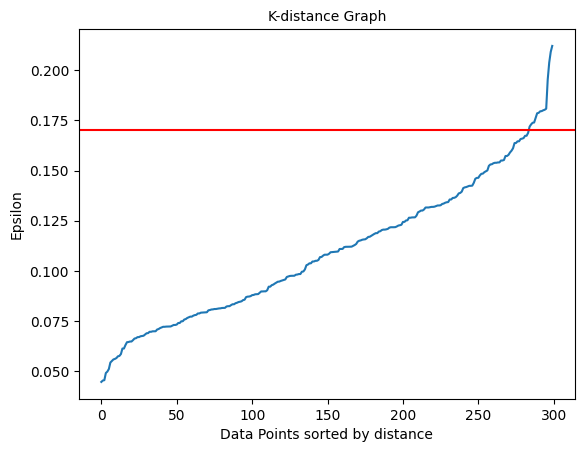

In [79]:
minPt=5
n=NearestNeighbors(n_neighbors=(minPt+1))
nb=n.fit(X)

distence,indeces=nb.kneighbors(X)
distence=np.sort(distence,axis=0)
distence=distence[:,5]

plt.plot(distence)
plt.axhline(y=0.17, c='red')
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

array([1., 2.])

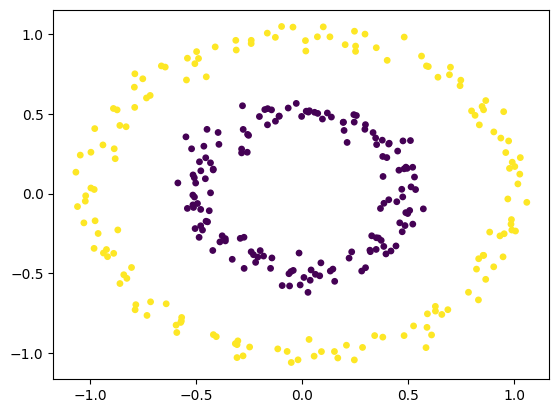

In [80]:
D_d4=dbscanAlgo(X,0.17,5)
plt.scatter(X[:,0],X[:,1],c=D_d4,s=15)
pd.Series(D_d4).unique()

In [81]:
from_2_to_0=(D_d4==2)

D_d4[from_2_to_0]=0

Text(0.5, 1.0, 'Predicted')

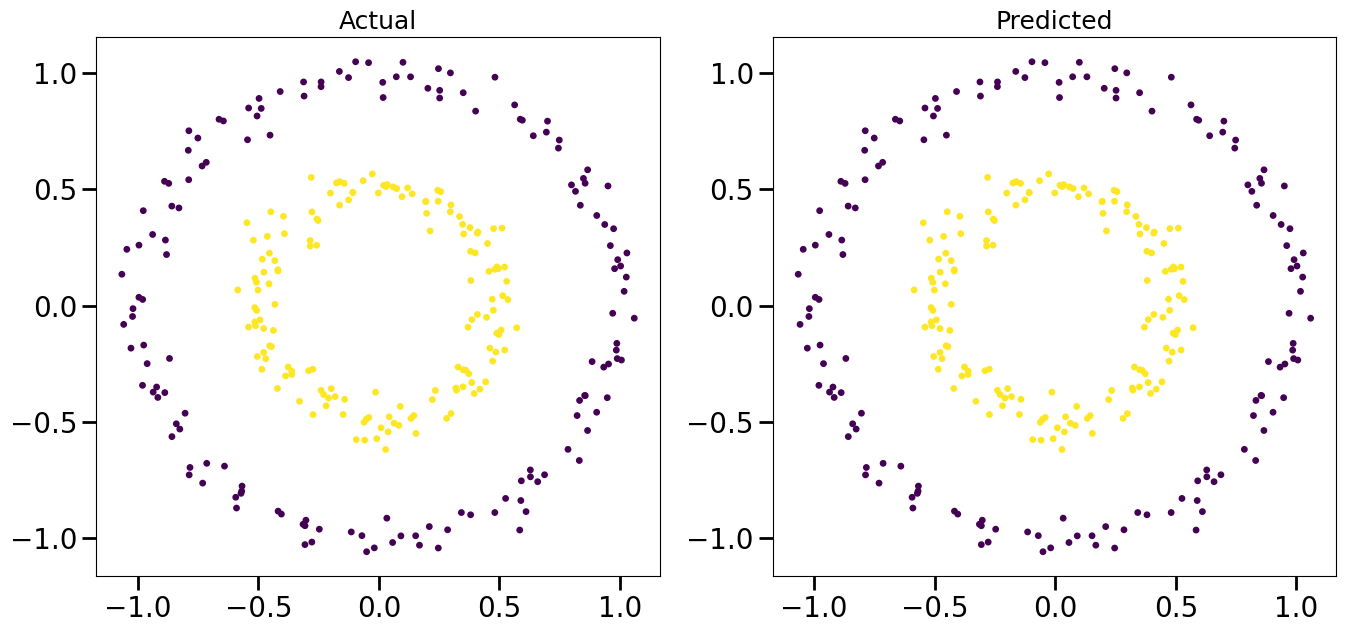

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].scatter(X[:,0],X[:,1], c=y,s=15)
axes[1].scatter(X[:,0],X[:,1], c=D_d4, s=15)

axes[0].tick_params(length=10, width=2, labelsize=20)
axes[1].tick_params(length=10, width=2, labelsize=20)

axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

validation

In [83]:
#F-measure:
F_D4=f1_score(y, D_d4, average='macro')
F_D4

1.0

In [84]:
#Normalized mutual information:
NMI_D4=normalized_mutual_info_score(y,D_d4)
NMI_D4

1.0

In [85]:
#Rand Statistic
R_D4=rand_score(y,D_d4)
R_D4

1.0